In [87]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install geopandas
!pip install geodatasets
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 681.3 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 43.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 77.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 38.0 MB/s eta 0:00:0000:0100:01


# Importe de librerias

In [161]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas
import geodatasets
from geodatasets import get_path
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from shapely.geometry import Point, Polygon
from shapely.wkt import loads

%matplotlib inline

In [3]:
data = pd.read_csv("../data/CDGBvideos_cc50_202101.csv")

In [4]:
data.dtypes

video_id                   object
trending_date              object
title                      object
channel_title              object
publish_time               object
tags                       object
views                       int64
likes                       int64
dislikes                    int64
comment_count               int64
thumbnail_link             object
comments_disabled            bool
ratings_disabled             bool
video_error_or_removed       bool
description                object
state                      object
lat                       float64
lon                       float64
geometry                   object
CategoryTitle              object
PercentageLikes           float64
PercentageDislikes        float64
dtype: object

In [5]:
data['publish_time'] = pd.to_datetime(data['publish_time'])
data["trending_date"] = pd.to_datetime(data["trending_date"])

In [6]:
data.dtypes

video_id                               object
trending_date                  datetime64[ns]
title                                  object
channel_title                          object
publish_time              datetime64[ns, UTC]
tags                                   object
views                                   int64
likes                                   int64
dislikes                                int64
comment_count                           int64
thumbnail_link                         object
comments_disabled                        bool
ratings_disabled                         bool
video_error_or_removed                   bool
description                            object
state                                  object
lat                                   float64
lon                                   float64
geometry                               object
CategoryTitle                          object
PercentageLikes                       float64
PercentageDislikes                

In [7]:
data.head()

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,...,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry,CategoryTitle,PercentageLikes,PercentageDislikes
0,zxwfDlhJIpw,2018-06-06,kanye west / charlamagne interview,Kanye West,2018-05-01 15:57:06+00:00,"Kanye West|""YEEZY""|""Kanye""|""Charlamagne""|""The ...",8626957,168370,19694,48689,...,False,False,NaN,Derry,55.000375,-7.333284,POINT (-7.333283937 55.00037539),People & Blogs,89.53,10.47
1,zxwfDlhJIpw,2018-06-05,kanye west / charlamagne interview,Kanye West,2018-05-01 15:57:06+00:00,"Kanye West|""YEEZY""|""Kanye""|""Charlamagne""|""The ...",8610062,168184,19664,48649,...,False,False,NaN,Westminster,51.499995,-0.116722,POINT (-0.116721844 51.49999473),People & Blogs,89.53,10.47
2,zxwfDlhJIpw,2018-06-04,kanye west / charlamagne interview,Kanye West,2018-05-01 15:57:06+00:00,"Kanye West|""YEEZY""|""Kanye""|""Charlamagne""|""The ...",8596449,168026,19640,48633,...,False,False,NaN,Nottingham,52.970344,-1.170017,POINT (-1.170016725 52.97034426),People & Blogs,89.53,10.47
3,zxwfDlhJIpw,2018-06-03,kanye west / charlamagne interview,Kanye West,2018-05-01 15:57:06+00:00,"Kanye West|""YEEZY""|""Kanye""|""Charlamagne""|""The ...",8579665,167841,19615,48621,...,False,False,NaN,Stoke On Trent,53.000368,-2.180007,POINT (-2.180006756 53.00036826),People & Blogs,89.54,10.46
4,zxwfDlhJIpw,2018-06-02,kanye west / charlamagne interview,Kanye West,2018-05-01 15:57:06+00:00,"Kanye West|""YEEZY""|""Kanye""|""Charlamagne""|""The ...",8561990,167664,19596,48580,...,False,False,NaN,Moray,58.966981,-2.950011,POINT (-2.950011435 58.96698081),People & Blogs,89.54,10.46


In [8]:
videoId = data["video_id"].unique().tolist()

# Por categoria de videos

In [9]:
listVideoId = data.drop_duplicates(subset=["video_id"], keep="first").reset_index(drop=True)
listVideoId.head()

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,...,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry,CategoryTitle,PercentageLikes,PercentageDislikes
0,zxwfDlhJIpw,2018-06-06,kanye west / charlamagne interview,Kanye West,2018-05-01 15:57:06+00:00,"Kanye West|""YEEZY""|""Kanye""|""Charlamagne""|""The ...",8626957,168370,19694,48689,...,False,False,NaN,Derry,55.000375,-7.333284,POINT (-7.333283937 55.00037539),People & Blogs,89.53,10.47
1,zxjv0lo8bU8,2018-06-09,MARCELO's son ENZO shows off his skills in the...,Real Madrid,2018-05-16 13:03:18+00:00,"Real Madrid C.F.|""Real Madrid""|""Real madrid ci...",275408,9697,107,564,...,False,False,"Watch how Marcelo's son, Enzo, plays with the ...",Perthshire And Kinross,56.400342,-3.469980,POINT (-3.469979697 56.40034161),Sports,98.91,1.09
2,zxGg8QqWrRQ,2017-12-18,"K Michelle on Boyfriend Kastan Sims, Having T...",ESSENCE,2017-12-06 19:37:48+00:00,"Essence|""essence live""|""Essence Now""|""Dr. Kast...",124057,1981,98,347,...,False,False,K. Michelle drops by ESSENCE Now to dish on he...,South Ayrshire,55.450400,-4.616680,POINT (-4.61667973 55.4503996),Entertainment,95.29,4.71
3,zwrlJwed2mQ,2017-12-30,BigCityBeats WORLD CLUB DOME Zero Gravity (Off...,BigCityBeats,2017-12-13 13:58:13+00:00,"BigCityBeats|""Zero Gravity""|""Flugzeug""|""Airpla...",107312,763,3,26,...,False,False,BigCityBeats presents ‘WORLD CLUB DOME Zero Gr...,Edinburgh,55.948328,-3.219091,POINT (-3.219090618 55.94832786),Entertainment,99.61,0.39
4,zwEn-ambXLw,2018-04-07,This Is Me - Cover by Shoshana Bean Featuring ...,Shoshana Bean,2018-03-22 08:30:07+00:00,"travis wall|""shoshana bean""|""greatest showman""...",246809,8626,146,328,...,False,False,I was lucky enough to lay the original demo fo...,Dungannon,54.520379,-6.670017,POINT (-6.670016929 54.52037884),Music,98.34,1.66


## Pregunta 1
## ¿Qué categorías de videos son las de mayor tendencia?

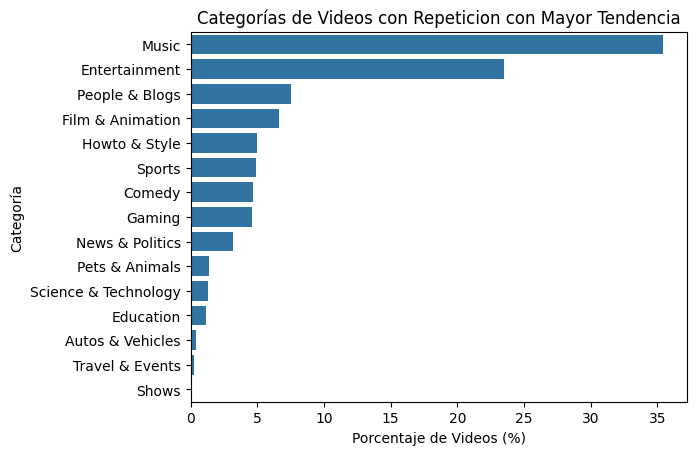

In [10]:
categoria_tendencias = data['CategoryTitle'].value_counts()
categoria_porcentajes = (categoria_tendencias / len(data)) * 100

sns.barplot(x=categoria_porcentajes.values, y=categoria_tendencias.index)
plt.title('Categorías de Videos con Repeticion con Mayor Tendencia')
plt.xlabel('Porcentaje de Videos (%)')
plt.ylabel('Categoría')
plt.show()

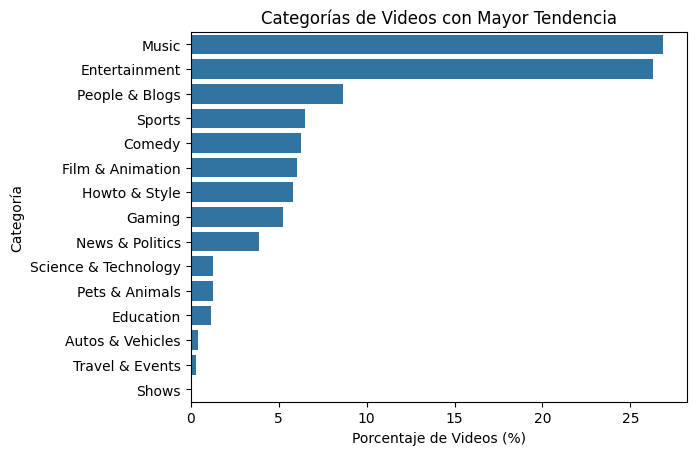

In [11]:
categoria_tendencias = listVideoId['CategoryTitle'].value_counts()
categoria_porcentajes = (categoria_tendencias / len(listVideoId)) * 100

sns.barplot(x=categoria_porcentajes.values, y=categoria_tendencias.index)
plt.title('Categorías de Videos con Mayor Tendencia')
plt.xlabel('Porcentaje de Videos (%)')
plt.ylabel('Categoría')
plt.show()

## Pregunta 2
## ¿Qué categorías de videos son los que más gustan? ¿Y las que menos gustan?

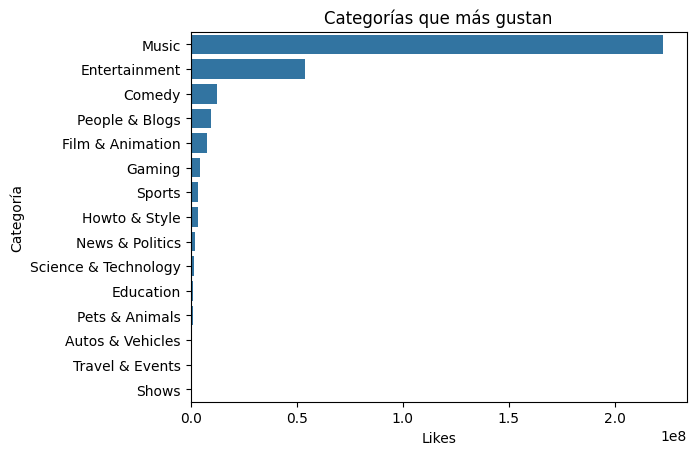

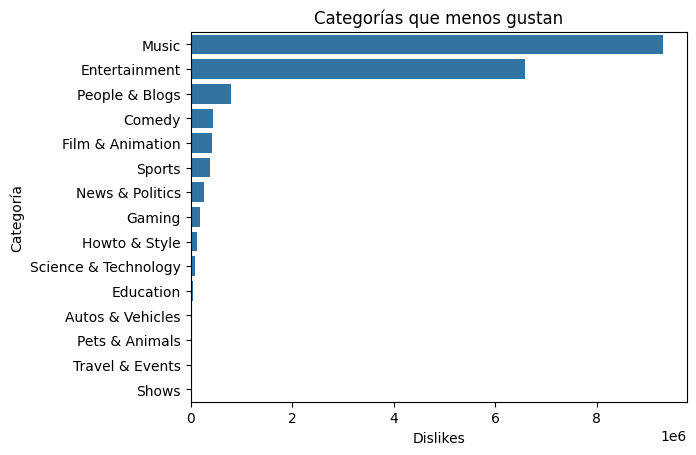

In [12]:
dislikedCategory = listVideoId.groupby('CategoryTitle')[['likes', 'dislikes']].sum()

likes_sort=dislikedCategory["likes"].sort_values(ascending=False)
dislikes_sort=dislikedCategory["dislikes"].sort_values(ascending=False)

sns.barplot(x=likes_sort, y=likes_sort.index)
plt.title('Categorías que más gustan')
plt.xlabel('Likes')
plt.ylabel('Categoría')
plt.show()

sns.barplot(x=dislikes_sort, y=dislikes_sort.index)
plt.title('Categorías que menos gustan')
plt.xlabel('Dislikes')
plt.ylabel('Categoría')
plt.show()


## Pregunta 3
## ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Me gusta” / “No me gusta”?


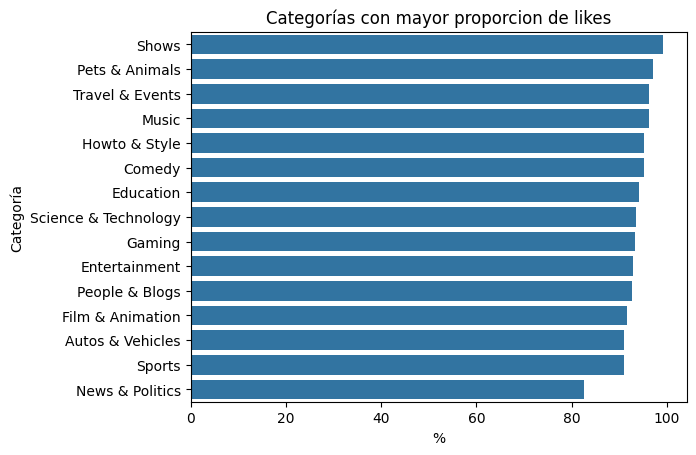

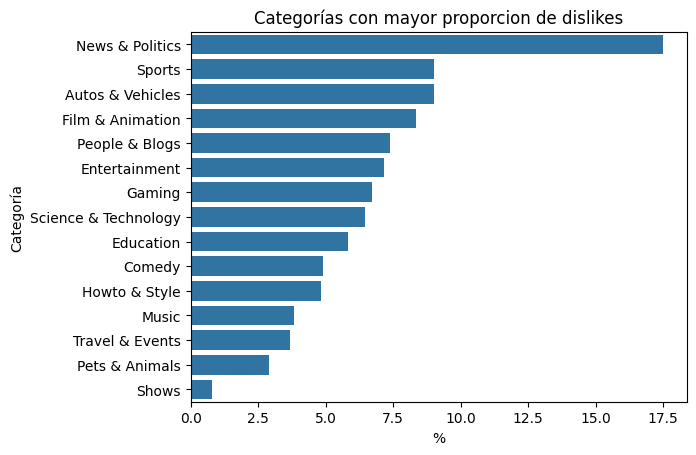

In [13]:
likedRCategory = (
    listVideoId[["CategoryTitle", "PercentageLikes", "video_id"]]
    .groupby("CategoryTitle")[["PercentageLikes"]]
    .mean()
    .reset_index()
    .sort_values(by="PercentageLikes", ascending=False)
)

dislikedRCategory = (
    listVideoId[["CategoryTitle", "PercentageDislikes", "video_id"]]
    .groupby("CategoryTitle")[["PercentageDislikes"]]
    .mean()
    .reset_index()
    .sort_values(by="PercentageDislikes", ascending=False)
)

sns.barplot(x=likedRCategory["PercentageLikes"], y=likedRCategory["CategoryTitle"])
plt.title('Categorías con mayor proporcion de likes')
plt.xlabel('%')
plt.ylabel('Categoría')
plt.show()

sns.barplot(x=dislikedRCategory["PercentageDislikes"], y=dislikedRCategory["CategoryTitle"])
plt.title('Categorías con mayor proporcion de dislikes')
plt.xlabel('%')
plt.ylabel('Categoría')
plt.show()


## Pregunta 4
## ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Vistas” / “Comentarios”?

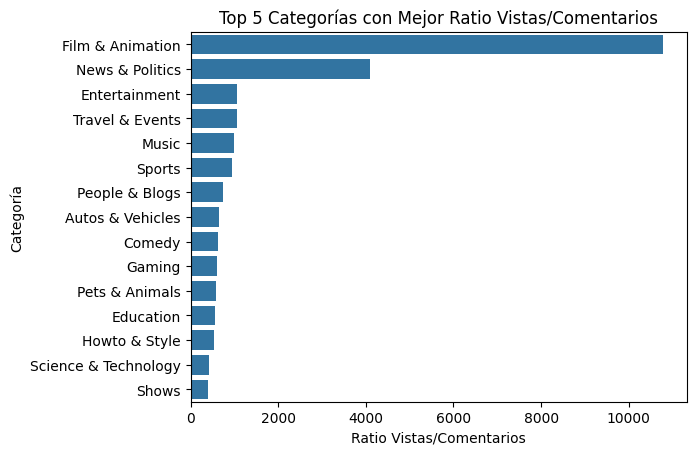

Top 5 categorías con mejor ratio vistas/comentarios:
CategoryTitle
Film & Animation    10783.922319
News & Politics      4092.065387
Entertainment        1066.132249
Travel & Events      1063.883472
Music                 988.910732
Name: view_comment_ratio, dtype: float64


In [24]:
viewsComments = viewsComments[viewsComments['comments_disabled'] == False]

viewsComments['view_comment_ratio'] = viewsComments['views'] / (viewsComments['comment_count'] + 1)

ratio_vc = viewsComments.groupby('CategoryTitle')['view_comment_ratio'].mean().sort_values(ascending= False)

top_categories = ratio_vc

sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title('Top 5 Categorías con Mejor Ratio Vistas/Comentarios')
plt.xlabel('Ratio Vistas/Comentarios')
plt.ylabel('Categoría')
plt.show()

print("Top 5 categorías con mejor ratio vistas/comentarios:")
print(ratio_vc.head())

# Por el tiempo transcurrido

## Pregunta 5
## ¿Cómo ha cambiado el volumen de los videos en tendencia a lo largo del tiempo?

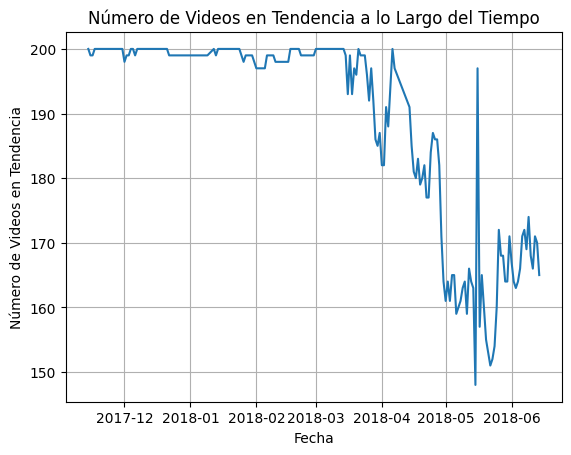

In [15]:
tendencias_tiempo = data.groupby('trending_date').size()

plt.plot(tendencias_tiempo.index, tendencias_tiempo.values)
plt.title('Número de Videos en Tendencia a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Número de Videos en Tendencia')
plt.grid(True)
plt.show()

# Por canales de YouTube

## Pregunta 6
## ¿Qué Canales de YouTube son tendencia más frecuentemente? ¿Y cuáles con menos frecuencia?

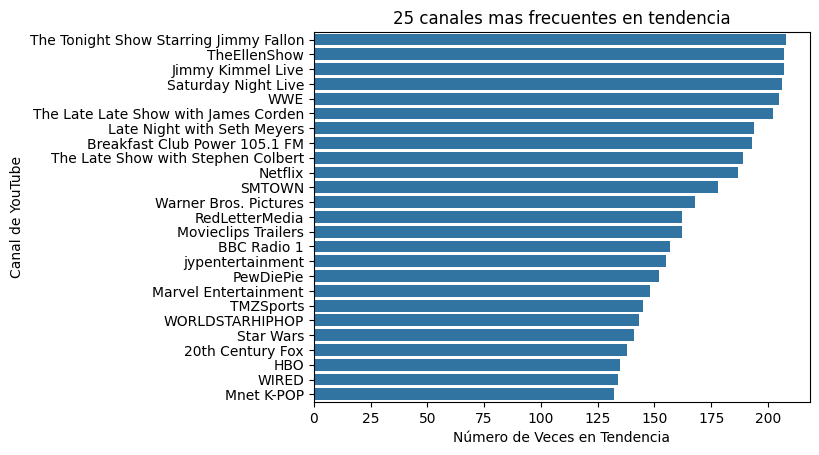

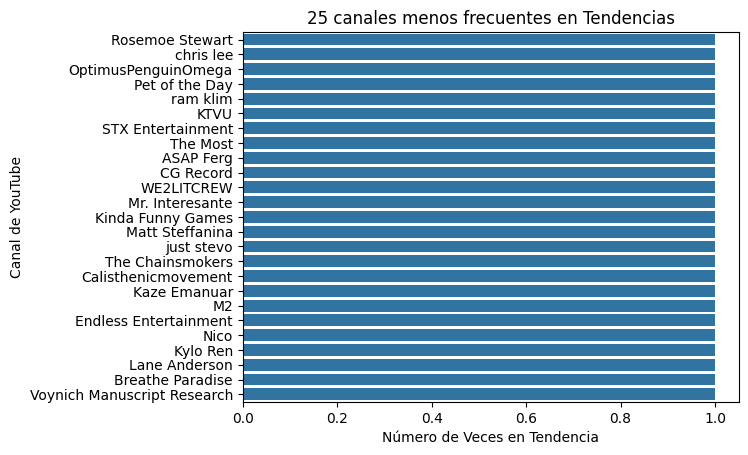

In [16]:
contador_canales = data['channel_title'].value_counts()

top_tendencias = contador_canales.head(25)

bottom_tendencias = contador_canales.tail(25)

sns.barplot(x=top_tendencias.values, y=top_tendencias.index)
plt.title('25 canales mas frecuentes en tendencia')
plt.xlabel('Número de Veces en Tendencia')
plt.ylabel('Canal de YouTube')
plt.show()

sns.barplot(x=bottom_tendencias.values, y=bottom_tendencias.index)
plt.title('25 canales menos frecuentes en Tendencias')
plt.xlabel('Número de Veces en Tendencia')
plt.ylabel('Canal de YouTube')
plt.show()

# Por la geografia del pais

## Pregunta 7
## ¿En qué Estados se presenta el mayor número de “Vistas”, “Me gusta” y “No me gusta”?

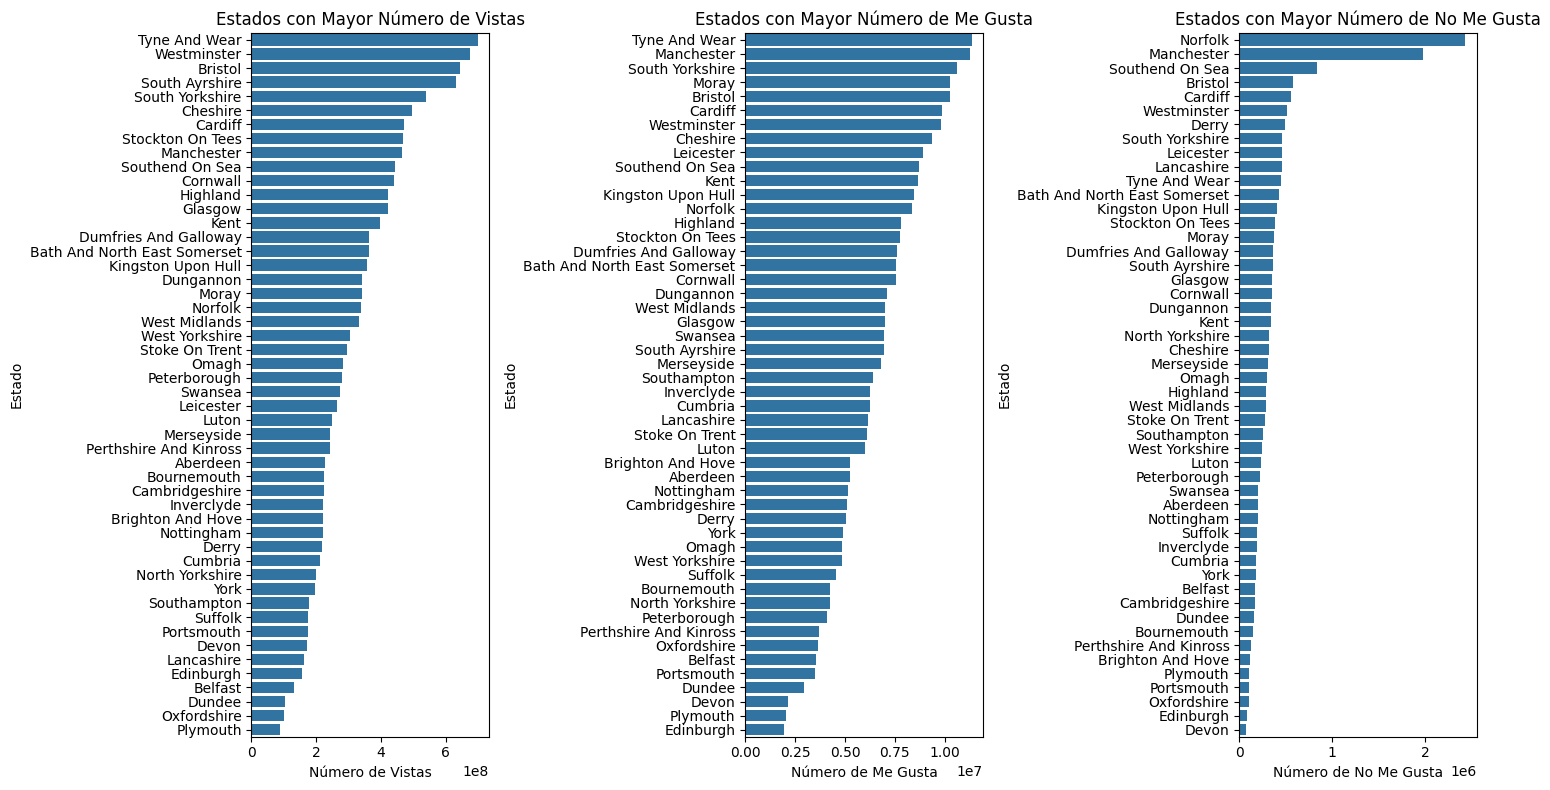

In [17]:
state_metrics = listVideoId.groupby('state')[['views', 'likes', 'dislikes']].sum()

top_views_states = state_metrics['views'].sort_values(ascending=False)
top_likes_states = state_metrics['likes'].sort_values(ascending=False)
top_dislikes_states = state_metrics['dislikes'].sort_values(ascending=False)

plt.figure(figsize=(15, 8))

plt.subplot(1, 3, 1)
sns.barplot(x=top_views_states, y=top_views_states.index)
plt.title('Estados con Mayor Número de Vistas')
plt.xlabel('Número de Vistas')
plt.ylabel('Estado')

plt.subplot(1, 3, 2)
sns.barplot(x=top_likes_states, y=top_likes_states.index)
plt.title('Estados con Mayor Número de Me Gusta')
plt.xlabel('Número de Me Gusta')
plt.ylabel('Estado')

plt.subplot(1, 3, 3)
sns.barplot(x=top_dislikes_states, y=top_dislikes_states.index)
plt.title('Estados con Mayor Número de No Me Gusta')
plt.xlabel('Número de No Me Gusta')
plt.ylabel('Estado')

plt.tight_layout()
plt.show()

In [28]:
ukData = data[["views", "likes", "dislikes", "PercentageLikes", "PercentageDislikes", "state","lat","lon","geometry"]]
ukData.head()

,views,likes,dislikes,PercentageLikes,PercentageDislikes,state,lat,lon,geometry
0,8626957,168370,19694,89.53,10.47,Derry,55.000375,-7.333284,POINT (-7.333283937 55.00037539)
1,8610062,168184,19664,89.53,10.47,Westminster,51.499995,-0.116722,POINT (-0.116721844 51.49999473)
2,8596449,168026,19640,89.53,10.47,Nottingham,52.970344,-1.170017,POINT (-1.170016725 52.97034426)
3,8579665,167841,19615,89.54,10.46,Stoke On Trent,53.000368,-2.180007,POINT (-2.180006756 53.00036826)
4,8561990,167664,19596,89.54,10.46,Moray,58.966981,-2.950011,POINT (-2.950011435 58.96698081)


In [217]:
geometry_metrics = listVideoId.groupby('geometry')[['views', 'likes', 'dislikes']].sum()

top_views_geometry = geometry_metrics['views'].sort_values(ascending=False).reset_index()
top_likes_geometry = geometry_metrics['likes'].sort_values(ascending=False).reset_index()
top_dislikes_geometry = geometry_metrics['dislikes'].sort_values(ascending=False).reset_index()

top_views_geometry["geometry"] = loads(top_views_geometry["geometry"])
top_likes_geometry["geometry"] = loads(top_likes_geometry["geometry"])
top_dislikes_geometry["geometry"] = loads(top_dislikes_geometry["geometry"])

top_views_geometry = geopandas.GeoDataFrame(top_views_geometry, geometry = top_views_geometry["geometry"])
top_likes_geometry = geopandas.GeoDataFrame(top_likes_geometry, geometry = top_likes_geometry["geometry"])
top_dislikes_geometry = geopandas.GeoDataFrame(top_dislikes_geometry, geometry = top_dislikes_geometry["geometry"])

errNorIre = geopandas.read_file("../data/topo_wpc_norire.json")
errWal = geopandas.read_file("../data/topo_eer_wal.json")
eerEng = geopandas.read_file("../data/topo_eer_eng.json")
eerScot = geopandas.read_file("../data/topo_eer_scot.json")

merged_gdf = pd.concat([errNorIre, errWal, eerEng, eerScot], ignore_index=True)
merged_gdf = geopandas.GeoDataFrame(merged_gdf)

## Vistas 

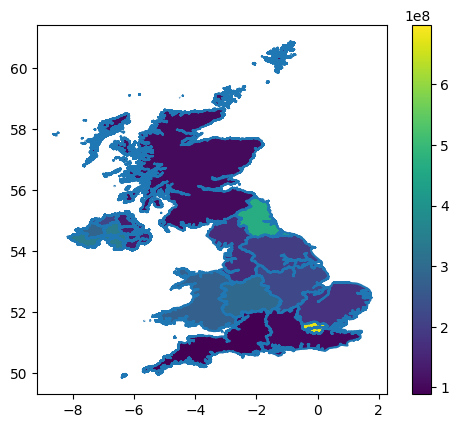

In [219]:
view_gdp = geopandas.sjoin_nearest(top_views_geometry, merged_gdf, how='right')

ax = merged_gdf.boundary.plot()
#merged_gdf.boundary.plot()
view_gdp.plot(ax = ax, column = "views", figsize=(20,20), legend =True)

plt.show()

## Likes

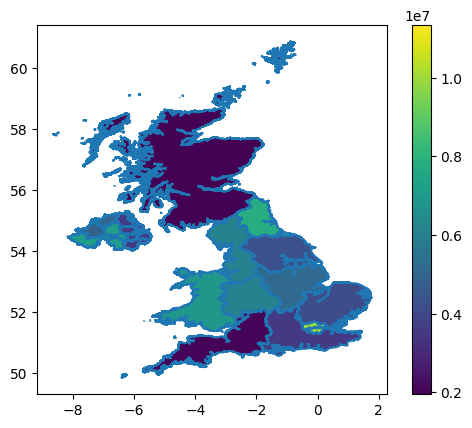

In [220]:
likes_gdp = geopandas.sjoin_nearest(top_likes_geometry, merged_gdf, how='right')

ax = merged_gdf.boundary.plot()
#merged_gdf.boundary.plot()
likes_gdp.plot(ax = ax, column = "likes", figsize=(20,20), legend =True)

plt.show()

## Dislikes

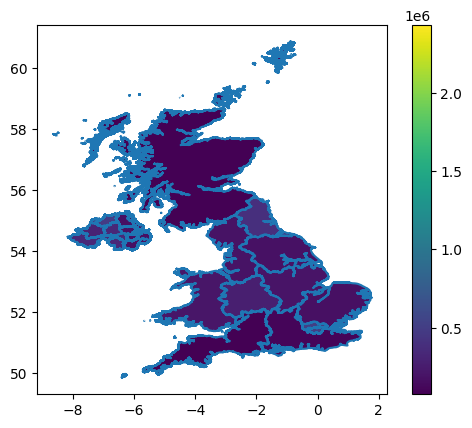

In [221]:
dislikes_gdp = geopandas.sjoin_nearest(top_dislikes_geometry, merged_gdf, how='right')

ax = merged_gdf.boundary.plot()
#merged_gdf.boundary.plot()
dislikes_gdp.plot(ax = ax, column = "dislikes", figsize=(20,20), legend =True)

plt.show()

# Preguntas Adicionales

## Pregunta 8
## ¿Es factible predecir el número de “Vistas” o “Me gusta” o “No me gusta”?

Coeficiente de determinación (R^z2): 0.7944867207960487


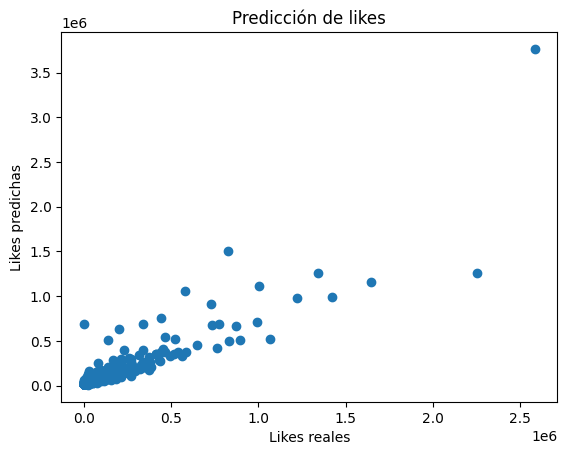

In [93]:
#Seleccionar características para el modelo
features = ['views', 'dislikes', 'comment_count']
X = listVideoId[features]
y = listVideoId['likes']

#Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

#Hacer predicciones
y_pred = model.predict(X_test)

#Evaluar el modelo
r2 = r2_score(y_test, y_pred)

print(f"Coeficiente de determinación (R^z2): {r2}")

#Visualizar predicciones vs valores reales
plt.scatter(y_test, y_pred)
plt.xlabel("Likes reales")
plt.ylabel("Likes predichas")
plt.title("Predicción de likes")
plt.show()

## Pregunta 9
## ¿Los videos en tendencia son los que mayor cantidad de comentarios positivos reciben?

Promedio de comentarios en videos en tendencia: 10326.302960526316
Promedio de comentarios en videos no en tendencia: 3163.5575221238937


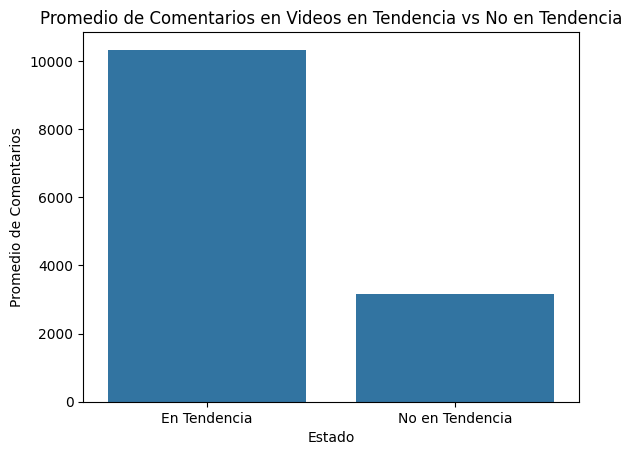

In [94]:
data['publish_time'] = pd.to_datetime(data['publish_time'])
data["trending_date"] = pd.to_datetime(data["trending_date"])
data['is_trending'] = data.duplicated(subset=['video_id'], keep=False)

listVideoId = data.drop_duplicates(subset=["video_id"], keep="first").reset_index(drop=True)

comments_trending = listVideoId[listVideoId['is_trending'] == True]['comment_count'].mean()
comments_non_trending = listVideoId[listVideoId['is_trending'] == False]['comment_count'].mean()

print(f"Promedio de comentarios en videos en tendencia: {comments_trending}")
print(f"Promedio de comentarios en videos no en tendencia: {comments_non_trending}")

#Visualizar los resultados
data_plot = pd.DataFrame({
    'Estado': ['En Tendencia', 'No en Tendencia'],
    'Promedio de Comentarios': [comments_trending, comments_non_trending]
})

sns.barplot(x='Estado', y='Promedio de Comentarios', data=data_plot)
plt.title('Promedio de Comentarios en Videos en Tendencia vs No en Tendencia')
plt.xlabel('Estado')
plt.ylabel('Promedio de Comentarios')
plt.show()